In [1]:
from plot_fig import spectra_plot
import pandas as pd
from scipy.signal import savgol_filter as sgf
import numpy as np

In [18]:
df_1 = pd.read_csv("/Users/george/desktop/Proteus.csv")
df_1 = df_1.replace("I","R")

In [19]:
df_1.head(2)

,ceftazidime,ciprofloxacin,gentamicin,1801.264,1799.335,1797.407,1795.478,1793.55,1791.621,1789.693,...,916.06,914.132,912.203,910.275,908.346,906.418,904.489,902.561,900.632,898.703
0,S,S,S,0.000846,0.000713,0.000610,0.000514,0.000442,0.000370,0.000318,...,0.00130,0.001302,0.001203,0.001021,0.000789,0.000554,0.000371,0.000264,0.000248,0.000318
1,S,S,S,0.000952,0.000820,0.000713,0.000605,0.000515,0.000415,0.000340,...,0.00134,0.001361,0.001262,0.001070,0.000817,0.000553,0.000343,0.000231,0.000230,0.000340


In [12]:
classes = list(df_1.select_dtypes(exclude="float").columns.values)
classes

['ceftazidime', 'ciprofloxacin', 'gentamicin']

# Spectral Figures For df_1

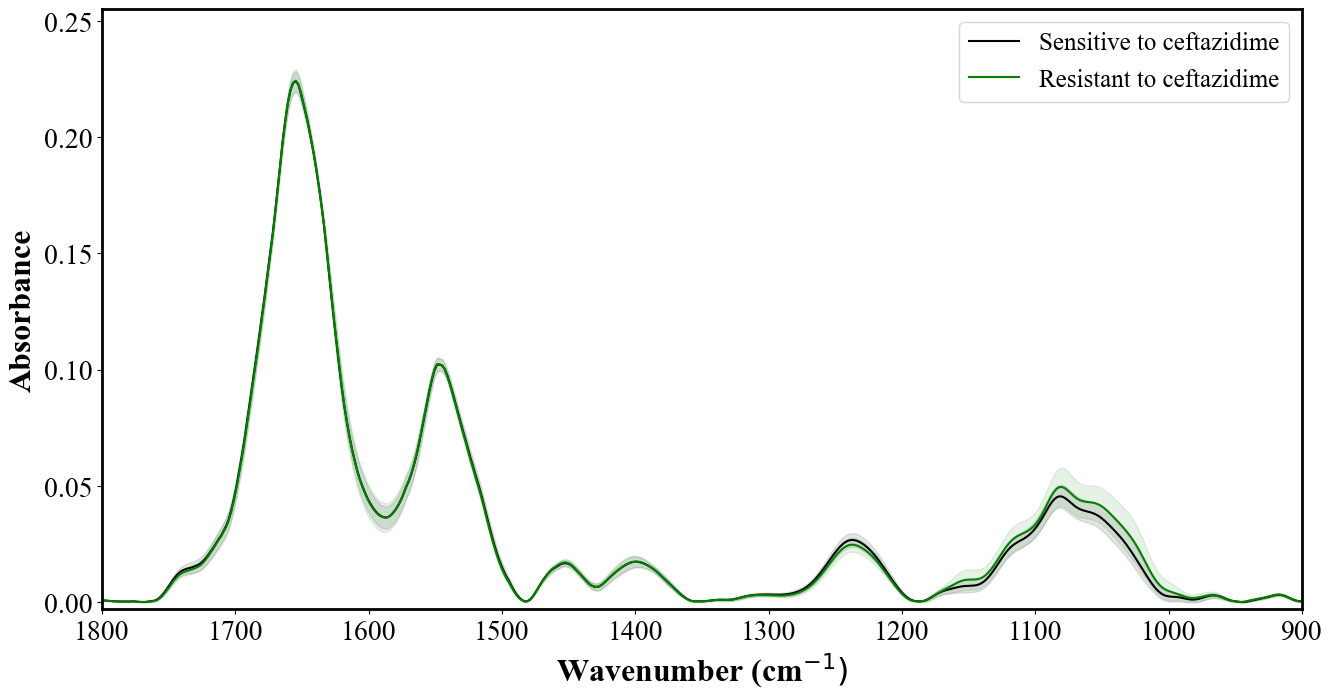

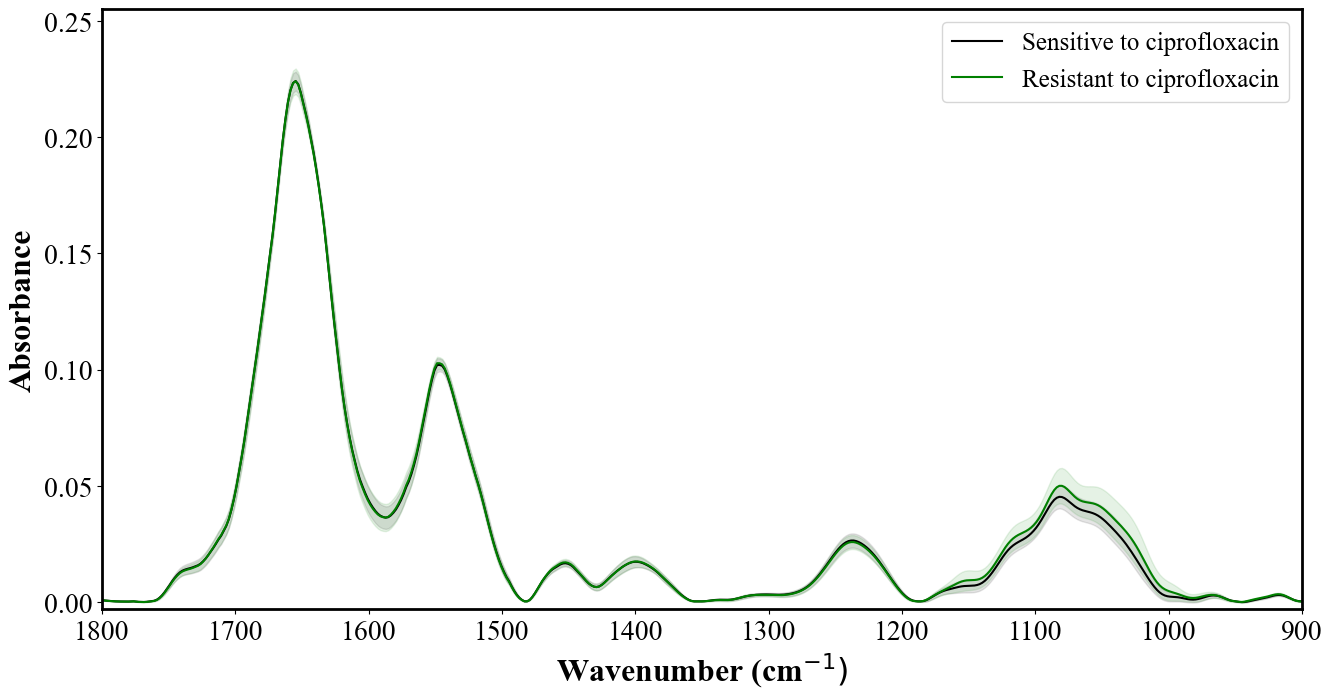

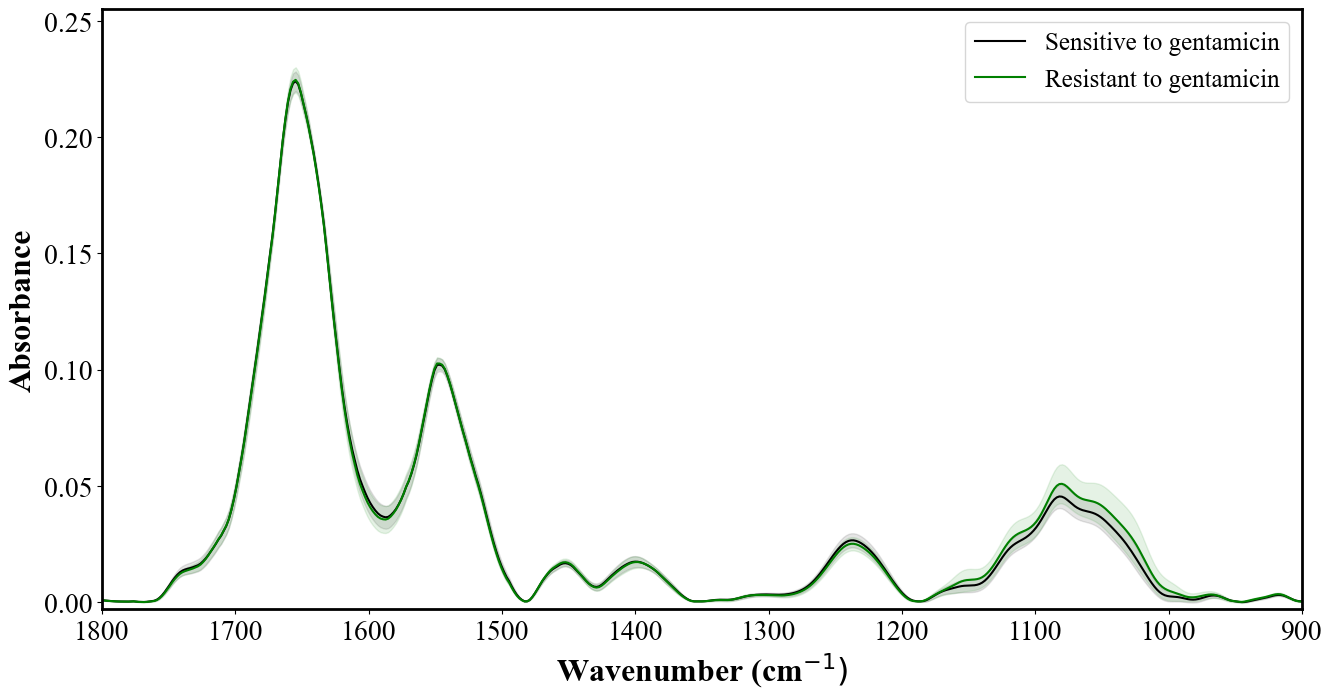

In [5]:
for ix, a in enumerate(classes):
    anti=a
    spectra_plot(df=df_1,
        label=anti,
        initial_feature='1801.264',
        final_feature='898.703',
        out_window_size_tuple_x=(1800, 900),
        out_window_size_tuple_y=(-0.003, 0.255),
        inset_axis=False,
        inset_window_position=[0.34, 0.438, 0.65, 0.54],
        labels_dict=[{'label': 'S', 'label_legend': 'Sensitive to '+anti, 'color': 'black'},
                     {'label': 'R', 'label_legend': 'Resistant to '+anti, 'color': 'g'}],
        confidence_iterval_width=1,
        texts_on_graph_dict=[{'which_axis': 'ax1', 'text_sentence': '', 'position_x': 1000, 'position_y': 0.025}],
        functional_groups=False,
        functional_groups_dict=[{'group_name': 'Amid I', 'arrow_position': (1655, 0.225), 'xytext': (1635, 0.245)},
                                {'group_name': 'Amid II', 'arrow_position': (1545, 0.110), 'xytext': (1525, 0.130)},
                                {'group_name': 'CH$_3$', 'arrow_position': (1455, 0.022), 'xytext': (1435, 0.042)},
                                {'group_name': 'CCO$^-$', 'arrow_position': (1400, 0.030), 'xytext': (1380, 0.050)},
                                {'group_name': 'Amid III', 'arrow_position': (1241, 0.030), 'xytext': (1221, 0.050)},
                                {'group_name': 'Carbohydrates', 'arrow_position': (1080, 0.090), 'xytext': (1060, 0.110)}],
        inset_control_x=(1180, 958),
        inset_control_y=(0, 0.1),
        legend_location=1,
        graph_item='',
        save_fig=False,
        y_title='Absorbance',
        x_title='Wavenumber (cm$^{-1})$',
        file_name='spectra_'+a)

# Second derivative

In [20]:
first_class = classes[0]
last_class = classes[-1]

In [21]:
data = df_1
X = data.loc[:, "1801.264":'898.703'].values
X_der = sgf(X, window_length=13, polyorder=3, deriv=2, mode="nearest")
y = data.loc[:, first_class : last_class].values

Xy = np.concatenate((y,X_der), axis=1)
df_2nd = pd.DataFrame(Xy, columns=data.columns)
df_2nd.head(2)

,ceftazidime,ciprofloxacin,gentamicin,1801.264,1799.335,1797.407,1795.478,1793.55,1791.621,1789.693,...,916.06,914.132,912.203,910.275,908.346,906.418,904.489,902.561,900.632,898.703
0,S,S,S,-0.000012,-0.000009,-0.000004,0.000002,0.000008,0.000012,0.000013,...,-0.000056,-0.000057,-0.000047,-0.000027,-0.000007,0.000011,0.000024,0.000029,0.000028,0.000022
1,S,S,S,-0.000014,-0.000012,-0.000006,0.0,0.000007,0.000013,0.000016,...,-0.000061,-0.000063,-0.000052,-0.000031,-0.000008,0.000012,0.000026,0.000032,0.000031,0.000024


# Save CSV?

In [15]:
save_as_csv = False
if(save_as_csv):
    df_2nd.to_csv('2nd_derivative_df_1.csv')

# Spectral Figures For df_2nd

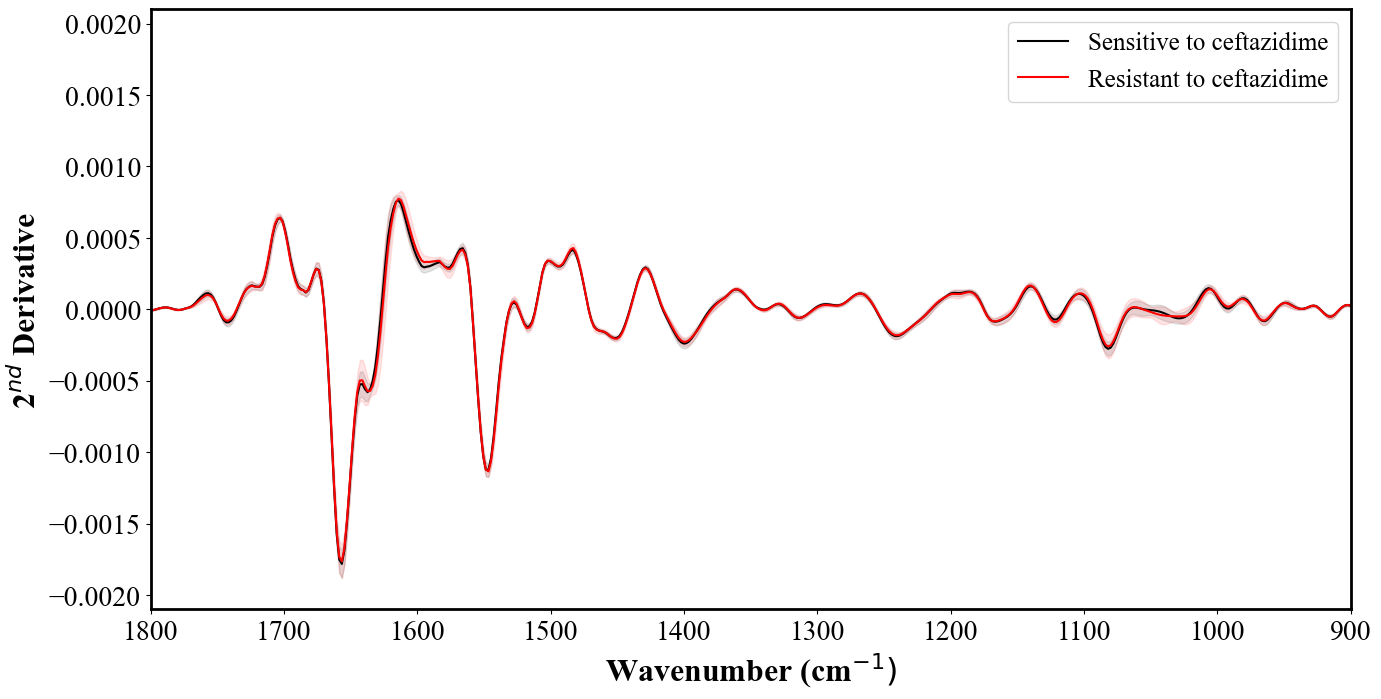

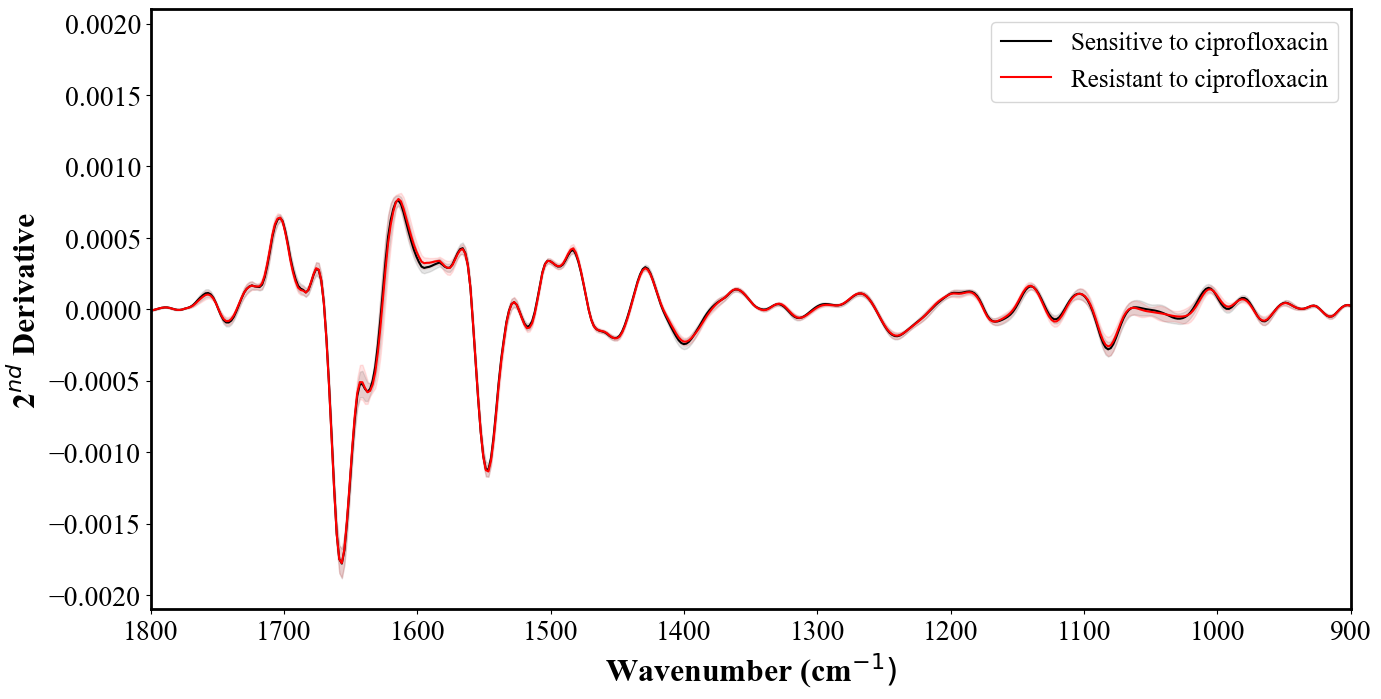

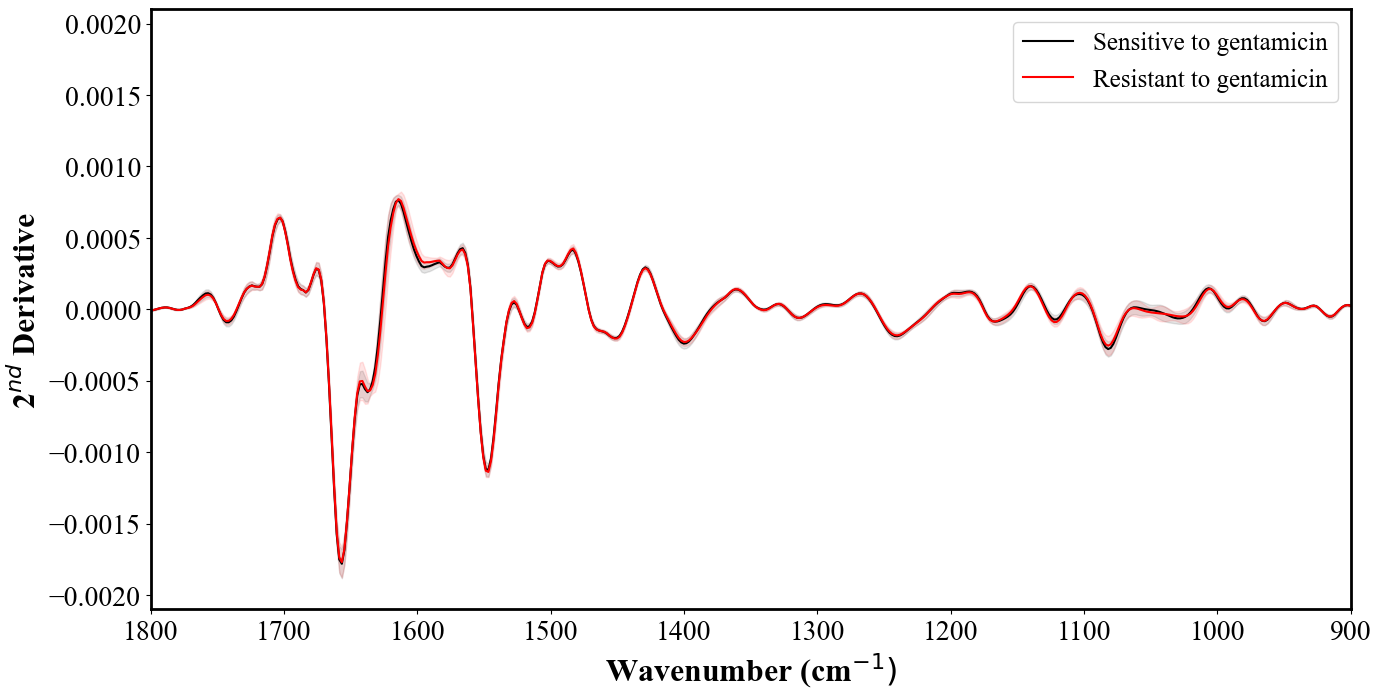

In [22]:
for ix, a in enumerate(classes):
    anti=a
    spectra_plot(df=df_2nd,
        label=anti,
        initial_feature='1801.264',
        final_feature='898.703',
        out_window_size_tuple_x=(1800, 900),
        out_window_size_tuple_y=(-0.0021, 0.0021),
        #out_window_size_tuple_y=(-0.0025, 0.0011),
        inset_axis=False,
        inset_window_position=[0.43, 0.07, 0.55, 0.43],
        labels_dict=[{'label': 'S', 'label_legend': 'Sensitive to '+anti, 'color': 'black'},
                     {'label': 'R', 'label_legend': 'Resistant to '+anti, 'color': 'red'}],
        confidence_iterval_width=1,
        texts_on_graph_dict=[{'which_axis': 'ax1', 'text_sentence': '', 'position_x': 1000, 'position_y': 0.025}],
        functional_groups=False,
        functional_groups_dict=[{'group_name': 'Amid I', 'arrow_position': (1655, 0.225), 'xytext': (1635, 0.245)},
                                {'group_name': 'Amid II', 'arrow_position': (1545, 0.110), 'xytext': (1525, 0.130)},
                                {'group_name': 'CH$_3$', 'arrow_position': (1455, 0.022), 'xytext': (1435, 0.042)},
                                {'group_name': 'CCO$^-$', 'arrow_position': (1400, 0.030), 'xytext': (1380, 0.050)},
                                {'group_name': 'Amid III', 'arrow_position': (1241, 0.030), 'xytext': (1221, 0.050)},
                                {'group_name': 'Carbohydrates', 'arrow_position': (1080, 0.090), 'xytext': (1060, 0.110)}],
        inset_control_x=(1180, 975),
        inset_control_y=(-0.0008, 0.0005),
        legend_location=1,
        graph_item='',
        save_fig=True,
        y_title='2$^{nd}$ Derivative',
        x_title='Wavenumber (cm$^{-1})$',
        file_name='spectra_2nd_prt_'+a)